In [3]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import nltk
nltk.download('stopwords')

# printing the stopwords in English
print(stopwords.words('english'))

news_dataset = pd.read_csv(r"C:\Users\hp\Desktop\fds\fake news\train.csv.zip")

news_dataset.shape

news_dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

# merging the author name and news title
news_dataset['content'] = news_dataset['author']+'   '+news_dataset['title']

print(news_dataset['content'])


0        Darrell Lucus   House Dem Aide: We Didn’t Even...
1        Daniel J. Flynn   FLYNN: Hillary Clinton, Big ...
2        Consortiumnews.com   Why the Truth Might Get Y...
3        Jessica Purkiss   15 Civilians Killed In Singl...
4        Howard Portnoy   Iranian woman jailed for fict...
                               ...                        
20795    Jerome Hudson   Rapper T.I.: Trump a ’Poster C...
20796    Benjamin Hoffman   N.F.L. Playoffs: Schedule, ...
20797    Michael J. de la Merced and Rachel Abrams   Ma...
20798    Alex Ansary   NATO, Russia To Hold Parallel Ex...
20799            David Swanson   What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [5]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [6]:
port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content




In [7]:
news_dataset['content'] = news_dataset['content'].apply(stemming)



In [8]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [9]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [10]:
print(Y)

[1 0 1 ... 0 1 1]


In [11]:
Y.shape

(20800,)

In [12]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [13]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210687 stored elements and shape (20800, 17128)>
  Coords	Values
  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (2079

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [16]:
#random forest algo
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf_model.fit(X_train, Y_train)


RandomForestClassifier(random_state=0)

In [17]:
# accuracy using randomforest

X_train_prediction = rf_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data using random forest : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = rf_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data using random forest: ', test_data_accuracy)


Accuracy score of the training data using random forest :  1.0
Accuracy score of the test data using random forest:  0.9942307692307693


In [15]:
model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

In [18]:
# accuracy score on the training data 
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the training data :  0.9863581730769231
Accuracy score of the test data :  0.9790865384615385


In [19]:
from sklearn.svm import SVC

# Training the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=2)
svm_model.fit(X_train, Y_train)

# Predicting the values using the SVM model
Y_pred_svm = svm_model.predict(X_test)

# Evaluating the model
svm_accuracy = accuracy_score(Y_test, Y_pred_svm)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9913461538461539


In [21]:
from sklearn.naive_bayes import MultinomialNB

# Training the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)

# Predicting the values using the Naive Bayes model
Y_pred_nb = nb_model.predict(X_test)

# Evaluating the model
nb_accuracy = accuracy_score(Y_test, Y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)


Naive Bayes Accuracy: 0.9550480769230769


In [22]:
# prediction using random forest 

#prediction
X_new = X_test[0] #making prediction for this

prediction = rf_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [ ]:
#prediction lr
X_new = X_test[0] #making prediction for this

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [ ]:
#svm prediction
# Example content to predict
example_news = ["Breaking: The stock market crashes, causing widespread panic."]

# Preprocessing the example news
example_news_processed = [stemming(content) for content in example_news]
example_news_vectorized = vectorizer.transform(example_news_processed)

# Predicting with SVM
prediction_svm = svm_model.predict(example_news_vectorized)

# Checking if the news is fake or not
if prediction_svm[0] == 0:
    print("SVM Prediction: The news is REAL.")
else:
    print("SVM Prediction: The news is FAKE.")


SVM Prediction: The news is FAKE.


In [ ]:
#nbay prediction
# Example content to predict
example_news = ["Breaking: The stock market crashes, causing widespread panic."]

# Preprocessing the example news
example_news_processed = [stemming(content) for content in example_news]
example_news_vectorized = vectorizer.transform(example_news_processed)

# Predicting with Naive Bayes
prediction_nb = nb_model.predict(example_news_vectorized)

# Checking if the news is fake or not
if prediction_nb[0] == 0:
    print("Naive Bayes Prediction: The news is REAL.")
else:
    print("Naive Bayes Prediction: The news is FAKE.")


Naive Bayes Prediction: The news is FAKE.


In [19]:
print(Y_test[0])

1


In [29]:
# Feature importance using SVM coefficients (linear kernel only)
svm_coefficients = svm_model.coef_.toarray()  # Coefficients of the SVM
feature_names = vectorizer.get_feature_names_out()

# Pair features with their importance
feature_importance = sorted(zip(svm_coefficients[0], feature_names), reverse=True)

# Displaying the most important features
print("Top positive features indicating 'FAKE' news:")
for coef, feat in feature_importance[:10]:
    print(f"{feat}: {coef}")

print("\nTop negative features indicating 'REAL' news:")
for coef, feat in feature_importance[-10:]:
    print(f"{feat}: {coef}")


Top positive features indicating 'FAKE' news:
hardest: 1.7362147460645492
comment: 1.502338656258428
kesel: 1.3942032621215688
barenakedislam: 1.3835485199377326
edjenn: 1.350539805495422
com: 1.3395711621461197
hillari: 1.3296516979607402
podesta: 1.2800405859401465
centuri: 1.2086458212453663
mitchel: 1.2062490365971155

Top negative features indicating 'REAL' news:
rodriguez: -3.6678630919319795
ph: -3.9156115767042885
tomlinson: -3.9256352805623456
montgomeri: -3.9527777102607753
riehl: -4.0268890709443985
time: -5.013445531164698
hayward: -5.048159689154874
nussbaum: -5.159907940276016
breitbart: -11.371549641879874
york: -13.190918356434748


In [28]:
# Predicting probabilities for the example news
example_news = ["Breaking: The stock market crashes, causing widespread panic."]
example_news_processed = [stemming(content) for content in example_news]
example_news_vectorized = vectorizer.transform(example_news_processed)

# Getting prediction probabilities
prediction_prob_nb = nb_model.predict_proba(example_news_vectorized)

# Displaying the probabilities
print("Naive Bayes Prediction Probabilities:")
print(f"Probability of REAL news: {prediction_prob_nb[0][0]}")
print(f"Probability of FAKE news: {prediction_prob_nb[0][1]}")

# Final decision
if prediction_prob_nb[0][1] > prediction_prob_nb[0][0]:
    print("Naive Bayes Prediction: The news is FAKE.")
else:
    print("Naive Bayes Prediction: The news is REAL.")


Naive Bayes Prediction Probabilities:
Probability of REAL news: 0.1978713002534291
Probability of FAKE news: 0.8021286997465713
Naive Bayes Prediction: The news is FAKE.


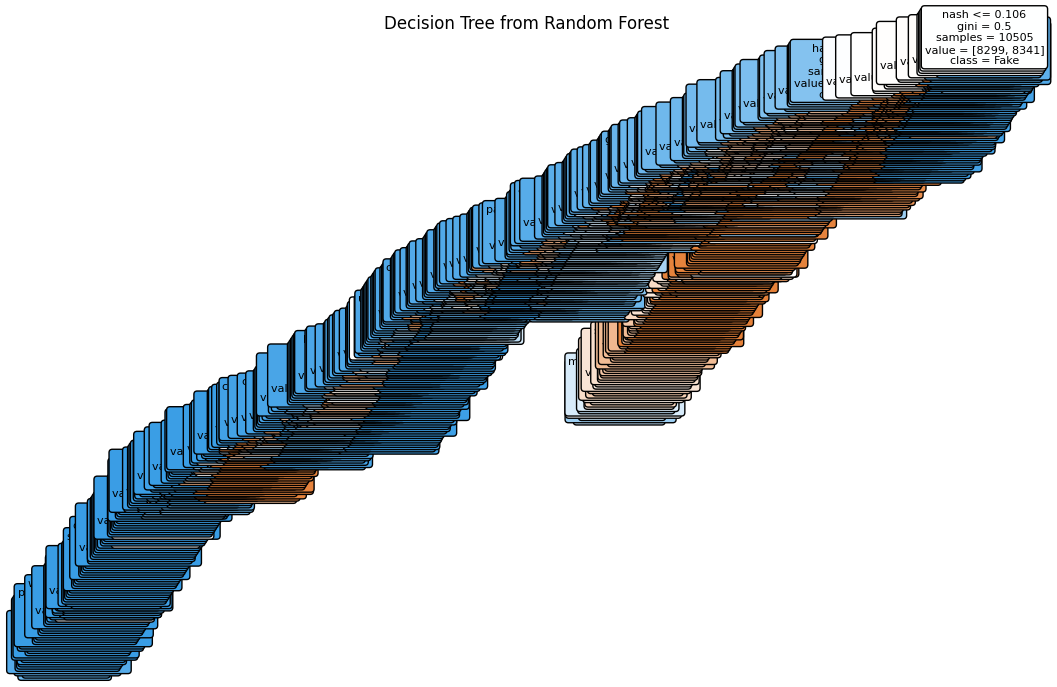

In [20]:
# random forest tree 

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'rf_model' is your trained Random Forest model
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(rf_model.estimators_[0], 
          feature_names=vectorizer.get_feature_names_out(),  
          class_names=['Real', 'Fake'], 
          filled=True, 
          rounded=True, 
          fontsize=8)  # Adjust fontsize as needed
plt.title("Decision Tree from Random Forest")
plt.show()
